In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stsc

In [23]:
sns.set_style("dark")
sns.set_theme(font_scale = 2, color_codes = True)

In [2]:
def load_and_process_all(filePath):
    import pandas as pd
    import statistics as stsc
    dfClean = (
        pd.read_csv(filePath,
        usecols = ["Rank", "Name", "Publisher", "Platform", "Genre", "Critic_Score","Year", "Total_Shipped"]) # So far our only focus of work
        .sort_values(by= "Rank", ascending = True) # Cash money check
        .dropna(thresh = 1, subset=['Critic_Score', 'Total_Shipped'])
        .assign(Year = lambda x: x["Year"].astype(str)) # Overriding original value to string for processing
        .reset_index(drop=True) # Reset index so we don't mess up orders
    )


    df2019 = (
        dfClean
        #.loc[lambda x: x["Year"].astype(str) ]
        #.loc[lambda x: x["Rank"] <= 3500] # Nothing ranked lower than 2500
        #.sort_values(by= "Averaged_Sales", ascending = False) # Re-sort in case any vales got changed
        .reset_index(drop = True) # Order things nicely
    )
    return df2019

In [3]:
df2019 = load_and_process_all("../../data/raw/vgsales-12-4-2019.csv")

In [4]:
df2019.describe().T
df2019

,Rank,Name,Genre,Platform,Publisher,Critic_Score,Total_Shipped,Year
0,1,Wii Sports,Sports,Wii,Nintendo,7.7,82.86,2006.0
1,2,Super Mario Bros.,Platform,NES,Nintendo,10.0,40.24,1985.0
2,3,Mario Kart Wii,Racing,Wii,Nintendo,8.2,37.14,2008.0
3,4,PlayerUnknown's Battlegrounds,Shooter,PC,PUBG Corporation,NaN,36.60,2017.0
4,5,Wii Sports Resort,Sports,Wii,Nintendo,8.0,33.09,2009.0
...,...,...,...,...,...,...,...,...
7772,55388,The Starship Damrey,Adventure,3DS,Level 5,5.4,NaN,2013.0
7773,55424,Thumper,Music,NS,Drool,9.0,NaN,2017.0
7774,55491,Travis Strikes Again: No More Heroes,Action,NS,Grasshopper Manufacture Inc.,8.0,NaN,2019.0
7775,55529,TumbleSeed,Action-Adventure,NS,aeiowu,7.0,NaN,2017.0


In [5]:
df2019G = df2019.groupby(["Genre","Publisher", "Year", "Platform"]).sum()["Total_Shipped"]
#df2019G
dfG = pd.DataFrame(df2019G)
dfG

Total_Shipped
Genre        Publisher Year   Platform               
Action       2K Games  2007.0 GBA                0.00
                              PSP                0.00
                       2010.0 PC                 2.31
                              PS3                0.00
                              X360               0.00
...                                               ...
Visual Novel Unknown   2004.0 PC                 0.51
                       2009.0 PC                 0.19
                       2011.0 PC                 0.19
                       2012.0 PC                 0.22
                       2017.0 PC                 0.89

[6005 rows x 1 columns]

In [6]:
#df2 = df2019.groupby("Genre").count()["Total_Shipped"]
#df2019G
#dfG1 = pd.DataFrame(df2)
#dfG1

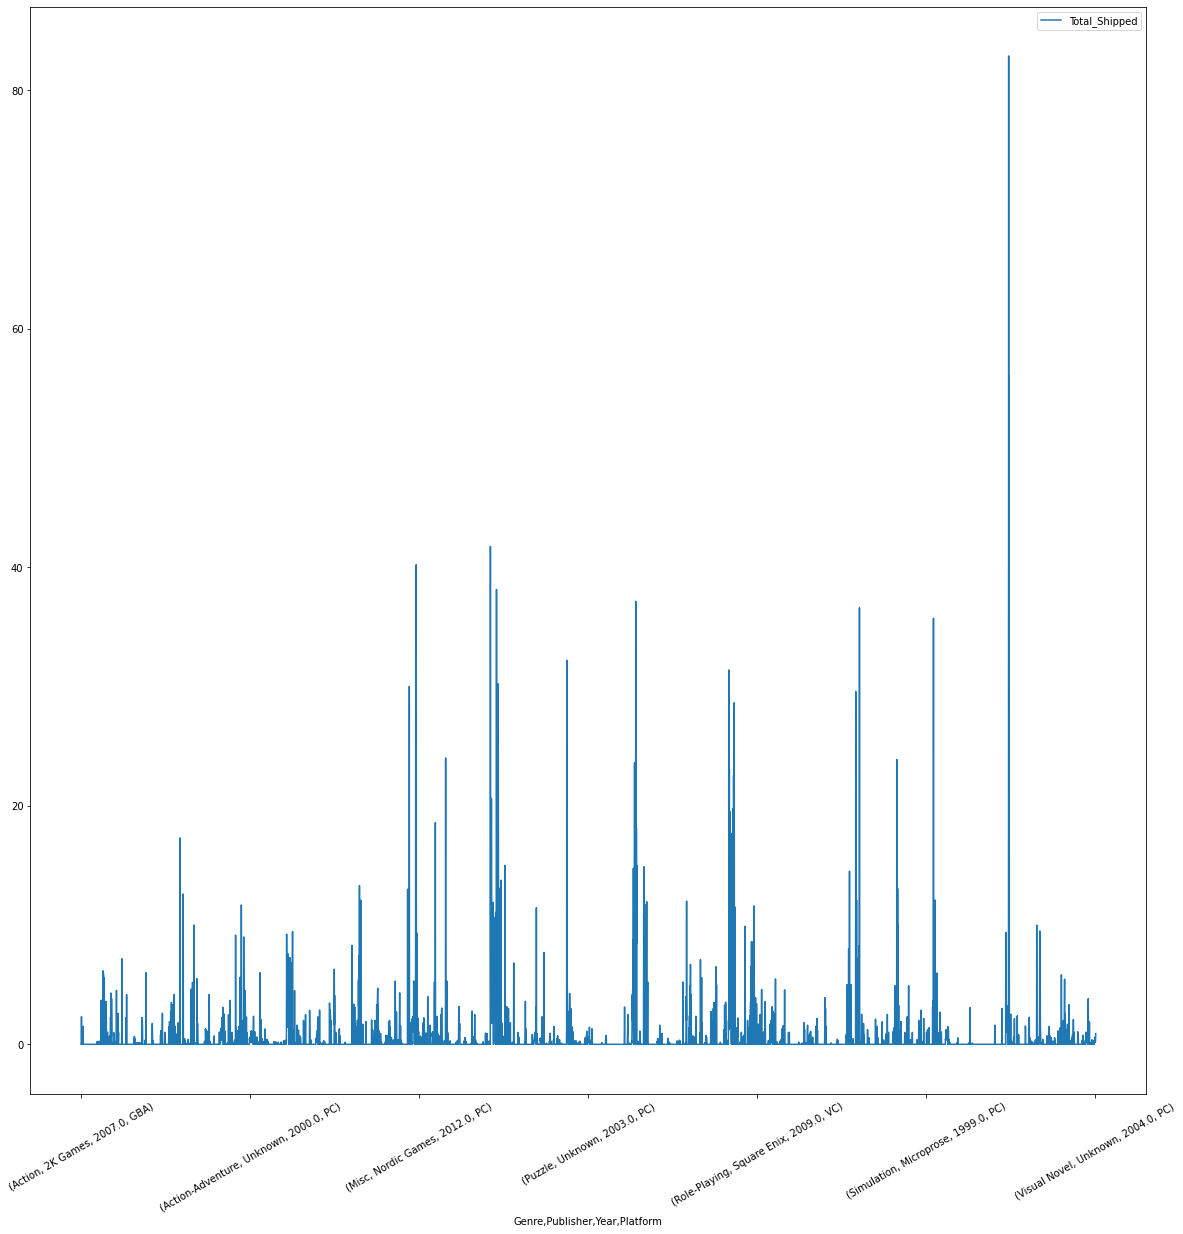

In [8]:
dfG.plot(figsize = (20,20))
plt.xticks(rotation=30) 
plt.show()

In [37]:
df2019G1 = df2019.groupby(["Genre", "Year"])["Name"].count()
#df2019G
dfG1 = pd.DataFrame(df2019G1)
dfG1

Name
Genre        Year        
Action       1985.0     1
             1986.0     1
             1988.0     1
             1991.0     1
             1993.0     2
...                   ...
Visual Novel 2012.0     3
             2013.0     1
             2014.0     1
             2016.0     3
             2017.0     2

[451 rows x 1 columns]

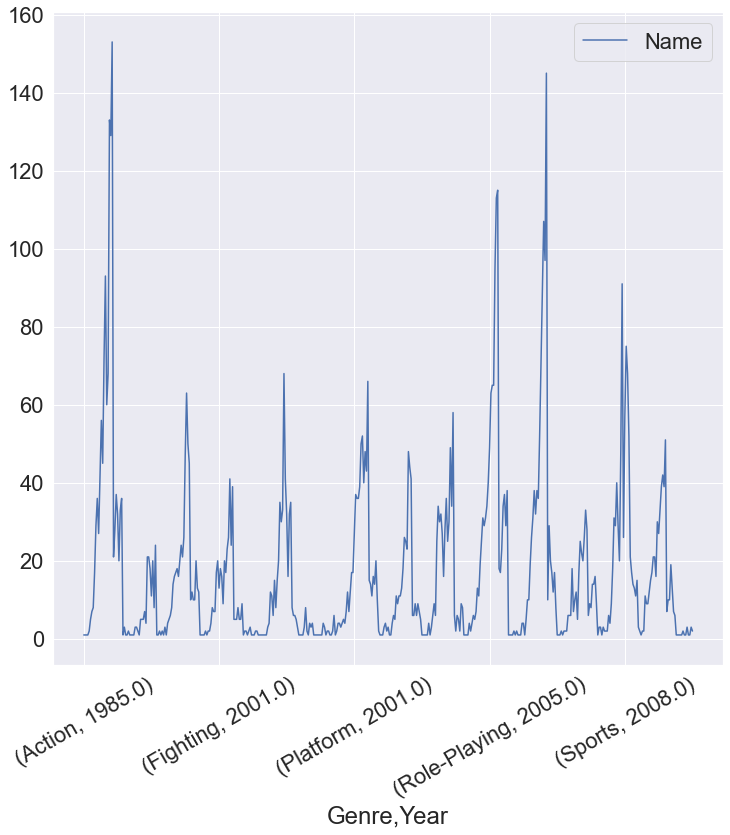

In [35]:
dfG1.plot(figsize=(12,12))
plt.xticks(rotation=30) 
plt.show()

<AxesSubplot:xlabel='Total_Shipped', ylabel='Genre'>

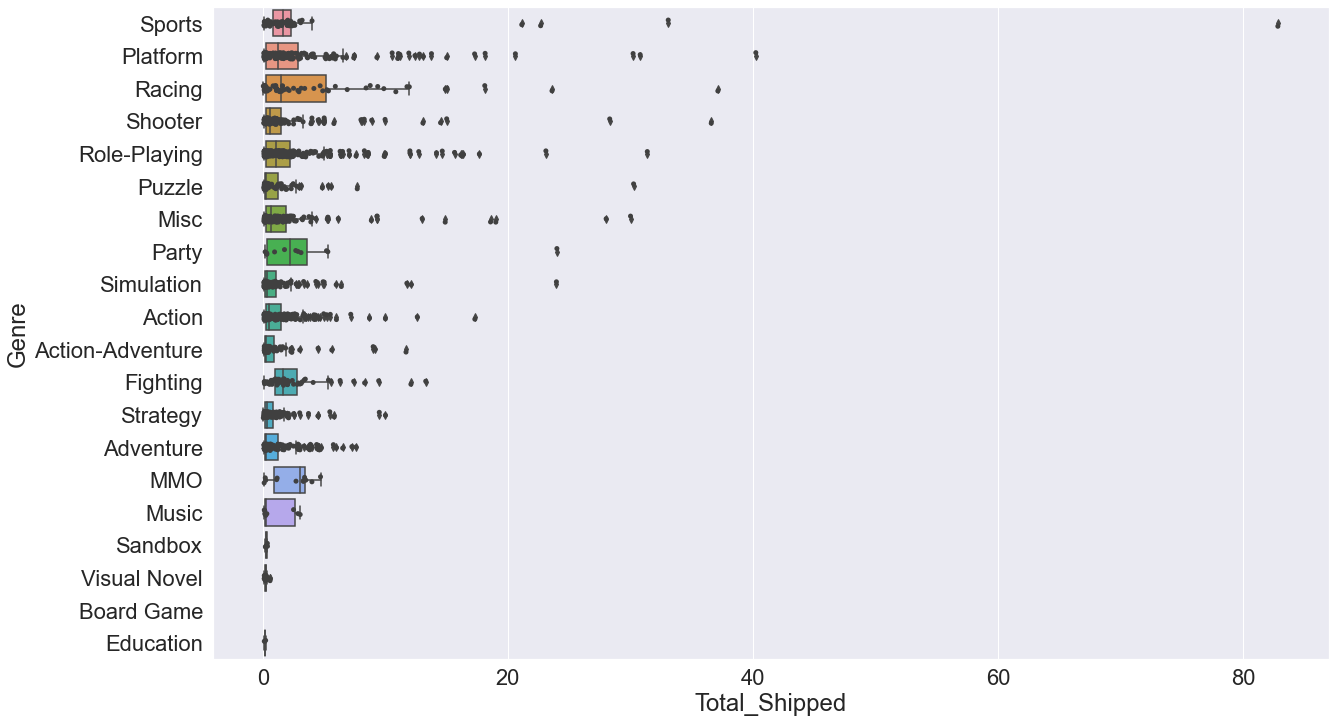

In [47]:
plt.figure(figsize=(20, 12))
sns.boxplot(data = df2019, x = "Total_Shipped", y = "Genre")
# swarm plot to display the datapoints over the box plot
sns.stripplot(data = df2019, x = "Total_Shipped", y = "Genre", color = "0.25")

In [43]:
#sns.pairplot(data = df2019, corner = True)